<a href="https://colab.research.google.com/github/taliarosenkranz/Marketing_Analysis_Forecasting/blob/main/Bancall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Info

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Variable Description

*	Age
* Job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* Education Level	(categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* Default -	has credit in default?
* Balance -	average yearly balance in	euros
* Housing -	has housing loan?
* Loan -	has personal loan?
* Contact	- contact communication type (categorical: 'cellular','telephone')
* Day_of_week	- last contact day of the week
* Month -	 last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* Duration	- last contact duration, in seconds (numeric). **Important note:** this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* Campaign -	number of contacts performed during this campaign and for this client.
* Pdays -	number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
* Previous -	number of contacts performed before this campaign and for this client
* Poutcome -	outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')		yes
* y	 - Target	has the client subscribed a term deposit?

# Goal of Analysis
 How did past campaigns perform and what were the features that had major influences on the success of the campaigns. Can these features also forcast the likelyhood of success per customer, for a current campaign? We will be looking at the distribution of the data, how the features correlate with our target variable and train a binary classification machine learning model for predicting a campaigns success or failure for a given customer.

# Libraries

In [195]:
# To handle the data
import pandas as pd
import numpy as np
import random
import joblib


# To visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# To preprocess the data and divide the data
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score, classification_report, confusion_matrix, roc_auc_score

# Machine learning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# ignore warnings
import warnings
warnings.filterwarnings('ignore')



# Importing the dataset

In [5]:
!pip install ucimlrepo

In [135]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

# Data inspection

In [136]:
print("X table shape is:", X.shape)
print("y table shape is:", y.shape)

X table shape is: (45211, 16)
y table shape is: (45211, 1)


In [137]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [138]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [139]:
X.isnull().sum()

age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
dtype: int64

In [140]:
y.isnull().sum()

y    0
dtype: int64

# Data manipulation

In [141]:
df_ = X.merge(y, how='inner', left_index=True, right_index=True)

In [142]:
df = df_.copy()
df.shape

(45211, 17)

In [143]:
# Converting month to numerical values
df['month'] = df['month'].replace({'may': '05', 'jun': '06', 'jul': '07', 'aug': '08', 'oct': '10', 'nov': '11', 'dec': '12', 'jan': '01', 'feb': '02', 'mar': '03', 'apr': '04', 'sep': '09'})


In [144]:
# Adding a year column so we can identify the day for each value
df['year']=pd.NA
fill_values = {idx: 2008 if idx < 27728 else (2009 if idx < 42591 else 2010) for idx in df.index}
df['year'] = df['year'].fillna(fill_values)

In [145]:
df=df.rename(columns={'day_of_week':'day'})

In [146]:
# Create the data column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [147]:
# From the data source we know the calls registry are from these dates
date_range = pd.date_range(start='2008-05-05', end='2010-11-11')

# Create a DataFrame with the date range
date_df = pd.DataFrame({'date': date_range})

# Get the day of the week for each date
date_df['day_of_week'] = date_df['date'].dt.day_name()


# Merge the two DataFrames on the 'date' column
df = df.merge(date_df[['date', 'day_of_week']], on='date', how='left')

# Check if the merge was successful
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day month  duration  campaign  pdays  previous poutcome   y  year  \
0     NaN    5    05       261         1     -1         0      NaN  no  2008   
1     NaN    5    05       151         1     -1         0      NaN  no  2008   
2     NaN    5    05        76         1     -1         0      NaN  no  2008   
3     NaN    5    05        92         1     -1         0      NaN  no  2008   
4     NaN    5    05       198         1     -1         0      NaN  no  2008   

        date day_of_week  
0 2008-05-05      Monday  
1 2008-05-05      Mo

## Missing values

In [148]:
#replacing missing values
df['job'].fillna('unknown', inplace=True)
df['education'].fillna('unknown', inplace=True)
df['contact'].fillna('unknown', inplace=True)
df['poutcome'].fillna('ongoing', inplace=True)

## Dealing with Outliers

In [149]:
# Droping lines where duration = 0 as they are outliers
print(df[df["duration"]==0])
df = df[df['duration'] != 0]

       age           job  marital  education default  balance housing loan  \
6424    53    management  married    primary      no      351     yes   no   
22937   35    technician  married  secondary      no     5535      no   no   
36425   31  entrepreneur  married  secondary      no      162     yes  yes   

        contact  day month  duration  campaign  pdays  previous poutcome   y  \
6424    unknown   27    05         0         4     -1         0  ongoing  no   
22937  cellular   26    08         0        15     -1         0  ongoing  no   
36425  cellular   11    05         0         2     -1         0  ongoing  no   

       year       date day_of_week  
6424   2008 2008-05-27     Tuesday  
22937  2008 2008-08-26     Tuesday  
36425  2009 2009-05-11      Monday  


In [150]:
# Droping lines where duration = 2 as they are outliers
print(df[df["duration"]==2])
df = df[df['duration'] != 2]

       age          job   marital  education default  balance housing loan  \
287     50   technician    single   tertiary      no      339     yes   no   
24994   36  blue-collar   married    primary      no      871     yes  yes   
30278   54   unemployed  divorced  secondary      no      925      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome   y  \
287      unknown    5    05         2         3     -1         0  ongoing  no   
24994  telephone   18    11         2         1     -1         0  ongoing  no   
30278   cellular    5    02         2         1     -1         0  ongoing  no   

       year       date day_of_week  
287    2008 2008-05-05      Monday  
24994  2008 2008-11-18     Tuesday  
30278  2009 2009-02-05    Thursday  


In [22]:
# Generate a list of random colors
num_plots = 5  # Number of box plots
random_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(num_plots)]

# Excluding new user where pdays = -1
new_user = df[df['pdays']!=-1]

plt.figure(figsize=(20, 20))

# make box plots for numeric columns

fig1 = px.box(data_frame=new_user, y='balance', color_discrete_sequence=[random_colors[0]], title="Balance Distribution")
fig2 = px.box(data_frame=new_user, y='duration', color_discrete_sequence=[random_colors[1]], title="Duration Distribution")
fig3 = px.box(data_frame=new_user, y='campaign', color_discrete_sequence=[random_colors[2]], title="Campaign Distribution")
fig4 = px.box(data_frame=new_user, y='pdays', color_discrete_sequence=[random_colors[3]], title="Previous Days Distribution")
fig5 = px.box(data_frame=new_user, y='previous', color_discrete_sequence=[random_colors[4]], title="Previous Distribution")
plt.tight_layout()

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=("Average Yearly Balance Distribution", "Call Duration Distribution (sec)",
                                                    "#Calls in this Campaign", "Last call (days)",
                                                    "Number of contacts (#calls)"))

# Add box plots to subplots
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=2, col=1)
fig.add_trace(fig4['data'][0], row=2, col=2)
fig.add_trace(fig5['data'][0], row=3, col=1)

# Update layout
fig.update_layout(height=800, showlegend=False)

# Show the subplot
fig.show()

<Figure size 2000x2000 with 0 Axes>

In [151]:
#creating function to filter outliers by inputed columns
def minmax_outlier_detection(data):
    # Filter the DataFrame to include only rows where the specified column is not equal to the specified value
    filtered_data = df[df['pdays'] != -1]

    # Calculate Q1 and Q3
    Q1 = filtered_data[data].quantile(0.25)
    Q3 = filtered_data[data].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define lower and upper fences
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    # Create a boolean mask to identify rows without outliers
    mask = ~((df[data] < lower_fence) | (df[data] > upper_fence))

    # Return the boolean mask
    return mask

# Apply outlier detection to each column and update df
mask_balance = minmax_outlier_detection('balance')
mask_previous = minmax_outlier_detection('previous')
mask_pdays = minmax_outlier_detection('pdays')
mask_campaign = minmax_outlier_detection('campaign')
mask_duration = minmax_outlier_detection('duration')

# Combine masks to identify rows without outliers in any column
combined_mask = mask_balance & mask_previous & mask_pdays & mask_campaign & mask_duration

# Filter df to keep rows without outliers
df = df[combined_mask]

df.shape



(29890, 20)

Before cleaning the outliers in the dataset there were 45211 values, now we have 29890 remaining.

In [24]:
# Generate a list of random colors
num_plots = 5  # Number of box plots
random_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(num_plots)]

plt.figure(figsize=(20, 20))

# Excluding new users so to see well distribution
filtered_data = df[df['pdays'] != -1]

# make box plots for numeric columns

fig1 = px.box(data_frame=filtered_data, y='balance', color_discrete_sequence=[random_colors[0]], title="Balance Distribution")
fig2 = px.box(data_frame=filtered_data, y='duration', color_discrete_sequence=[random_colors[1]], title="Duration Distribution")
fig3 = px.box(data_frame=filtered_data, y='campaign', color_discrete_sequence=[random_colors[2]], title="Campaign Distribution")
fig4 = px.box(data_frame=filtered_data, y='pdays', color_discrete_sequence=[random_colors[3]], title="Previous Days Distribution")
fig5 = px.box(data_frame=filtered_data, y='previous', color_discrete_sequence=[random_colors[4]], title="Previous Distribution")
plt.tight_layout()

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=("Average Yearly Balance Distribution", "Call Duration Distribution (sec)",
                                                    "#Calls in this Campaign", "Last call (days)",
                                                    "Number of contacts (#calls)"))

# Add box plots to subplots
fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=2, col=1)
fig.add_trace(fig4['data'][0], row=2, col=2)
fig.add_trace(fig5['data'][0], row=3, col=1)

# Update layout
fig.update_layout(height=800, showlegend=False)

# Show the subplot
fig.show()

<Figure size 2000x2000 with 0 Axes>

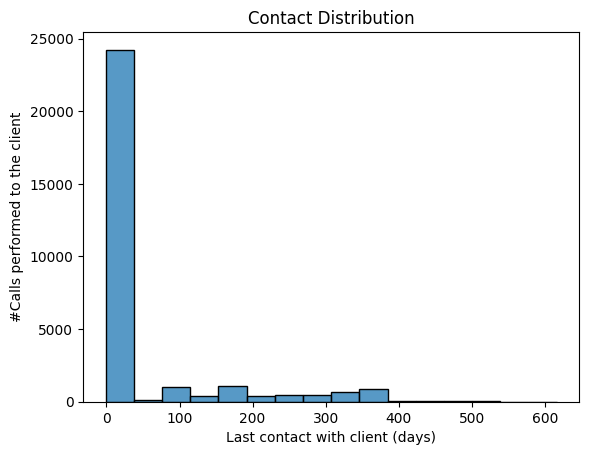

In [25]:
sns.histplot(data=df, x='pdays')
plt.xlabel('Last contact with client (days)')
plt.ylabel('#Calls performed to the client')
plt.title('Contact Distribution')
plt.show()

There seem to be a lot of null values in the poutcome column. this is because there is currently a campaign running in which these customers are involved in.

The pday feature shows -1 for all of the clients that have null values as poutcome, as they are new clients and have not been contacted before.

When analyzing the performance of previous campaigns, we are excluding new clients.

# Data Exploration/Distribution

Demographic analysis

Mean: 40
Mode: 0    32
Name: age, dtype: int64


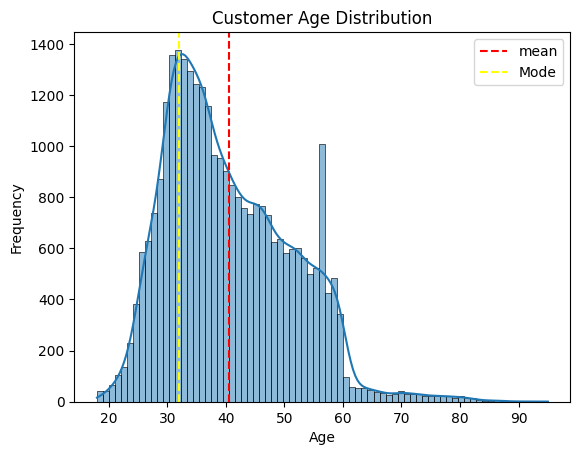

In [26]:
sns.histplot(df['age'],kde=True)
plt.axvline(df['age'].mean(), color='red', linestyle='--', label='mean')
plt.axvline(df['age'].mode().iloc[0], color='yellow', linestyle='--', label='Mode')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Customer Age Distribution")
plt.legend()

print('Mean:', int(df['age'].mean()))
print('Mode:', df['age'].mode())

plt.show()

Most of the values inside the dataset are distributed between the ages of 30 and 40, then there's a decreese for the following ages.

The mean age is 40 and the mode 32.

In [27]:
job_count = df.job.value_counts()
job_count

job
blue-collar      6540
management       5907
technician       4936
admin.           3693
services         2856
retired          1488
entrepreneur      977
self-employed     973
unemployed        871
housemaid         794
student           682
unknown           173
Name: count, dtype: int64

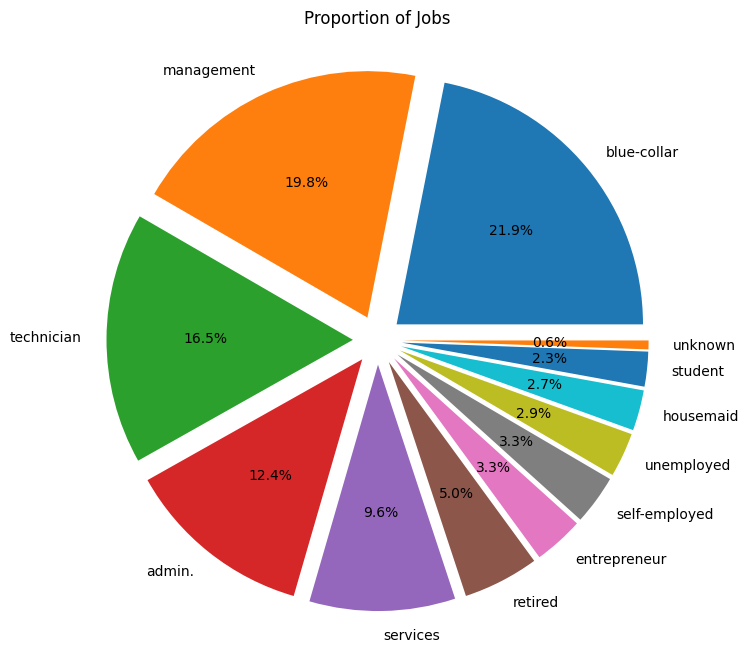

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
explode = [0.1] * len(df['job'].value_counts())
ax.pie(df['job'].value_counts(), labels=df['job'].value_counts().index, autopct='%1.1f%%', explode = explode)
ax.set_title('Proportion of Jobs')
plt.show()

The bisgest percentage of values in the dataset belongs to people that works as blue collars followed by management area, technicians and so.

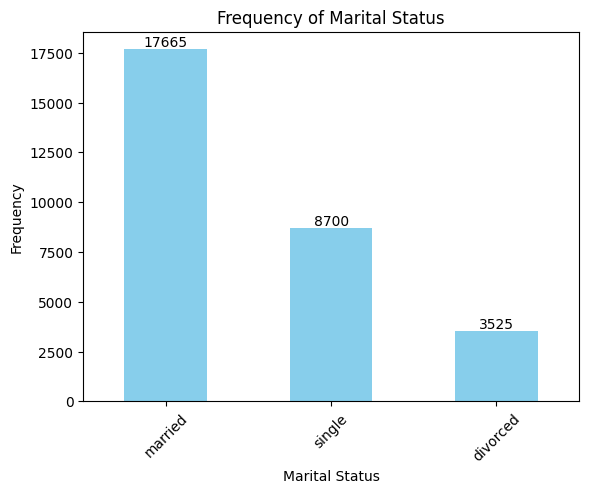

In [29]:
# Create a bar plot
ax = df['marital'].value_counts().plot(kind='bar', color='skyblue')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Add titles and labels
plt.title('Frequency of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show the plot
plt.show()


Most of the values in the dataset are married

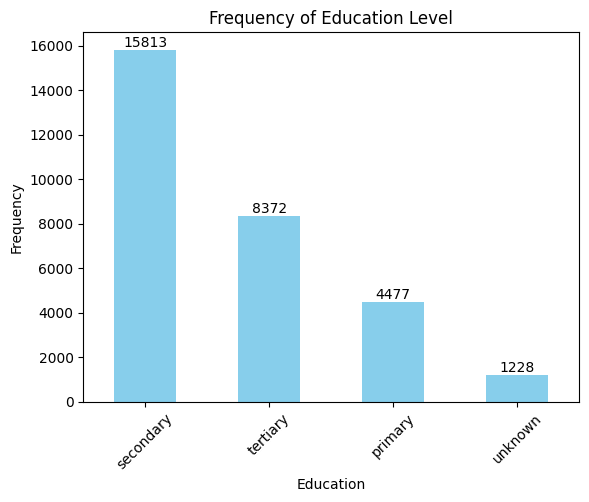

In [30]:
# Create a bar plot
ax = df['education'].value_counts().plot(kind='bar', color='skyblue')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Add titles and labels
plt.title('Frequency of Education Level')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Show the plot
plt.show()

Most of the people who received calls were asked if they would like to accept a loan, and these individuals typically have a secondary level education

## Previous Campaign Analysis

In [31]:
# Grouping values by different features
demo_seg = df.groupby(["age", "job", "marital","poutcome"])["duration"].mean().reset_index(name="duration_mean")

# Filtering "others" values so to evaluate the poutcome from previous campaigns
demo_seg_no_other = demo_seg[(demo_seg["poutcome"]!="other")&(demo_seg["poutcome"]!="ongoing")]

We are grouping the data using demographic features and excluding the new customers, to see the distribution of call duration

In [32]:
demo_seg_no_other

,age,job,marital,poutcome,duration_mean
2,18,student,single,success,151.000000
3,19,student,single,failure,158.333333
6,19,student,single,success,188.400000
11,20,student,married,failure,385.000000
13,20,student,single,failure,275.250000
...,...,...,...,...,...
2962,82,retired,married,success,275.000000
2965,83,retired,married,failure,201.000000
2967,84,retired,divorced,failure,145.000000
2974,86,retired,married,success,219.500000


In [33]:
fig = px.scatter(demo_seg_no_other, x="age", y="duration_mean", color="poutcome",
                 title="Distribution of Call Duration by Age",
                 labels={"age": "Age", "duration_mean": "Call Duration (sec)","job":"Job"},
                 hover_name="marital")

fig.update_layout(xaxis_title="Age", yaxis_title="Call Duration (sec)")

fig.show()

For the segmented group selected, it is evident that the majority of failures occur in calls with a duration with less than  5 minutes.

However, for individuals aged over 60, the majority of outcomes are successes.

Additionally, there is a higher likelihood of success for calls with an average duration greater than 5 minutes, as indicated by the plot

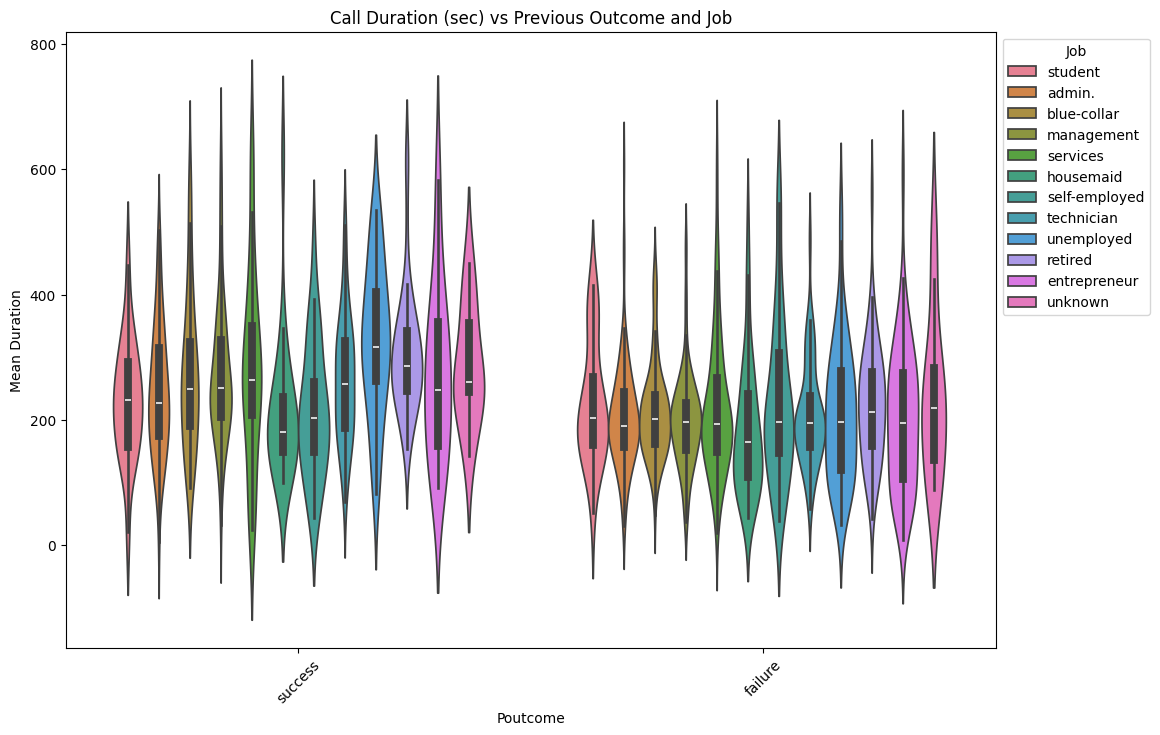

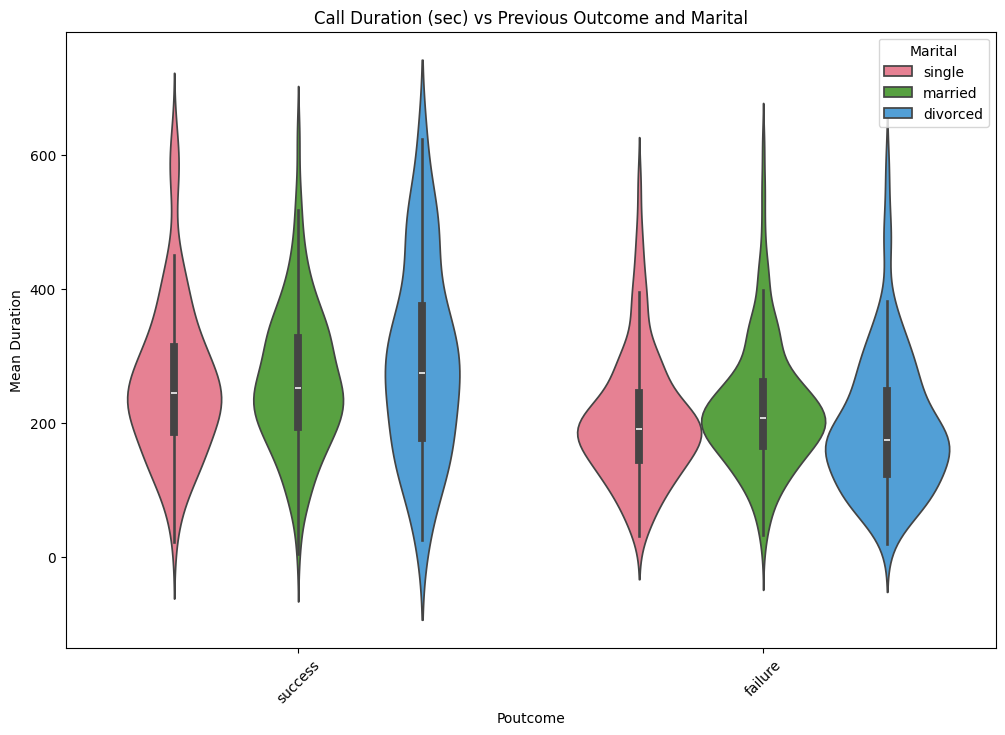

In [35]:
columns = ['job', 'marital']

for i in columns:
  plt.figure(figsize=(12, 8))
  sns.violinplot(data=demo_seg_no_other, x='poutcome', y='duration_mean', hue=i, dodge=True, palette='husl')

  plt.title('Call Duration (sec) vs Previous Outcome and ' + i.title())
  plt.xlabel('Poutcome')
  plt.ylabel('Mean Duration')
  plt.legend(title= i.title() , bbox_to_anchor=(1, 1))
  plt.xticks(rotation=45)
  plt.show()


For both features, we observe that successful outcomes from previous campaigns exhibit a higher density for average call durations exceeding 3 minutes (200 sec). This suggests that longer call durations may be associated with higher success rates, indicating a potential area of focus for future campaigns.

Success:
  *Mean: 43.7  *Mode: 38
Failure:
  *Mean: 43.17  *Mode: 40


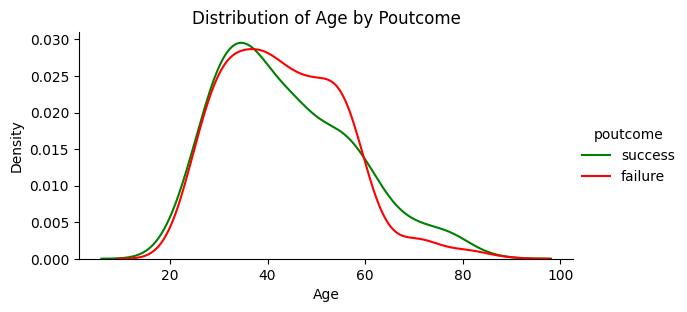

In [34]:
colors = {'success': 'green', 'failure': 'red'}
g = sns.FacetGrid(demo_seg_no_other, hue="poutcome", palette=colors, aspect=2)

g.map(sns.distplot, 'age', hist=False)
g.add_legend()

plt.title('Distribution of Age by Poutcome')
plt.xlabel('Age')
plt.ylabel('Density')

print('Success:\n',' *Mean:',round(demo_seg_no_other['age'][demo_seg_no_other['poutcome']=='success'].mean(),2) ,' *Mode:',demo_seg_no_other['age'][demo_seg_no_other['poutcome']=='success'].mode().iloc[0]  )
print('Failure:\n',' *Mean:',round(demo_seg_no_other['age'][demo_seg_no_other['poutcome']=='failure'].mean(),2) ,' *Mode:',demo_seg_no_other['age'][demo_seg_no_other['poutcome']=='failure'].mode().iloc[0]  )

plt.show()

Building on the previous conclusion, we can identify a specific area for potential improvement within the segmented values:

* Particularly among individuals with more than 60. This age group exhibits a notable proportion of success, suggesting an opportunity for the company to focus its efforts on refining its strategies or tailoring its offerings to better engage and convert customers within this demographic.

* It's also possible to note customers close to the age of 38 are more likely to accept a loan.

* From age 40 till 60 there're higher chances that the customer wont accept a loan.

**Timeline outcome analysis**

In [36]:
df_campaign = df.copy()
df_campaign = df[(df["poutcome"] != "other") & (df["poutcome"] != "ongoing")]

In [37]:
# Grouping by Day of the week and loan outcome
df_campaign_ = df_campaign.groupby(['day_of_week', 'poutcome'])['poutcome'].count().reset_index(name="outcome_count")

In [38]:
# Calculate conversion rate for each row
df_campaign_['conversion_rate'] = df_campaign_.apply(lambda row: row['outcome_count'] / df_campaign_[df_campaign_['day_of_week'] == row['day_of_week']]['outcome_count'].sum(), axis=1)
# Dropping Saturday and Sunday values as these are not working days (outliers)
df_campaign_ = df_campaign_[~((df_campaign_['day_of_week'] == 'Saturday') | (df_campaign_['day_of_week'] == 'Sunday'))]

In [39]:
# Define the custom order of days
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

# Convert the 'day_of_week' column to categorical with the custom order
df_campaign_['day_of_week'] = pd.Categorical(df_campaign_['day_of_week'], categories=days, ordered=True)

# Sort the DataFrame by the 'day_of_week' column
sorted_df_campaign = df_campaign_.sort_values(by='day_of_week')

# Display the sorted DataFrame
print(sorted_df_campaign)

   day_of_week poutcome  outcome_count  conversion_rate
2       Monday  failure            782         0.790698
3       Monday  success            207         0.209302
7      Tuesday  failure            591         0.737828
8      Tuesday  success            210         0.262172
9    Wednesday  failure            652         0.744292
10   Wednesday  success            224         0.255708
5     Thursday  failure            808         0.748148
6     Thursday  success            272         0.251852
0       Friday  failure            730         0.819304
1       Friday  success            161         0.180696


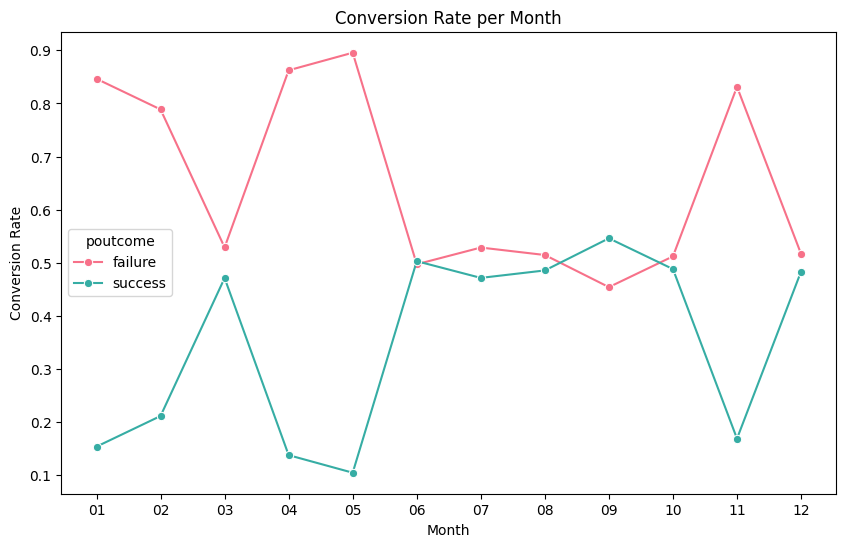

In [40]:
# Grouping by month
df_campaign_month = df_campaign.groupby(['month', 'poutcome'])['poutcome'].count().reset_index(name="outcome_count")
# Calculate conversion rate for each row
df_campaign_month['conversion_rate'] = df_campaign_month.apply(lambda row: row['outcome_count'] / df_campaign_month[df_campaign_month['month'] == row['month']]['outcome_count'].sum(), axis=1)

# Plot conversion rate per month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_campaign_month, x='month', y='conversion_rate', hue='poutcome', marker='o', palette='husl')

# Set title, x-label, and y-label
plt.title('Conversion Rate per Month')
plt.xlabel('Month')
plt.ylabel('Conversion Rate')

# Show the plot
plt.show()

After analyzing the plot, it's evident that the most favorable months for customer acceptance of a loan are March, June, and particularly September, where we observe a higher conversion rate. Therefore, focusing efforts on contacting customers during these months may yield better outcomes.

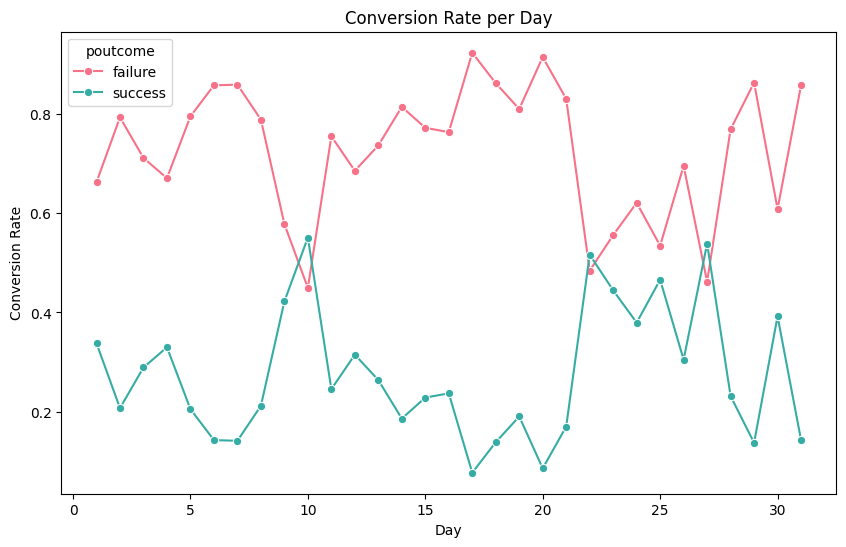

In [41]:
# Grouping by day
df_campaign_day = df_campaign.groupby(['day', 'poutcome'])['poutcome'].count().reset_index(name="outcome_count")
# Calculate conversion rate for each row
df_campaign_day['conversion_rate'] = df_campaign_day.apply(lambda row: row['outcome_count'] / df_campaign_day[df_campaign_day['day'] == row['day']]['outcome_count'].sum(), axis=1)

# Plot conversion rate per month
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_campaign_day, x='day', y='conversion_rate', hue='poutcome', marker='o', palette='husl')

# Set title, x-label, and y-label
plt.title('Conversion Rate per Day')
plt.xlabel('Day')
plt.ylabel('Conversion Rate')

# Show the plot
plt.show()

We can appreciate that by the end of the month is where the conversion rate of users accepting loans increase.

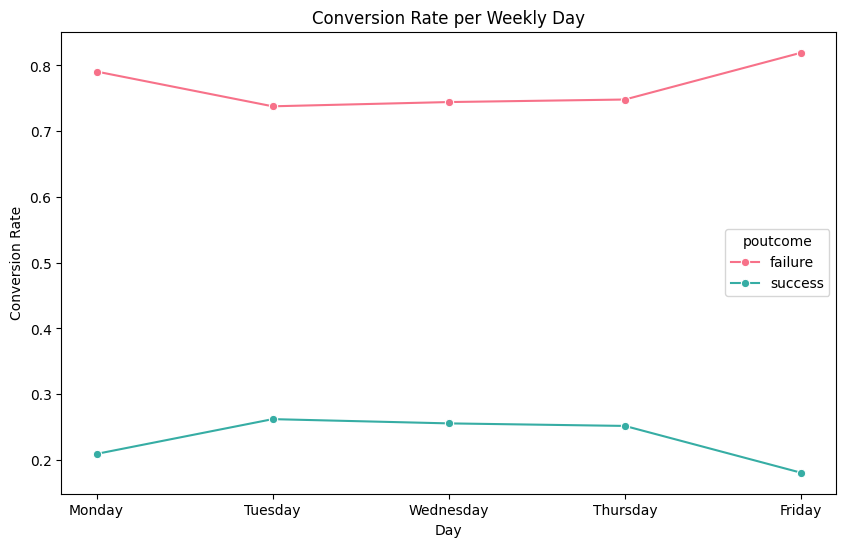

In [42]:
# Plot conversion rate against campaign
plt.figure(figsize=(10, 6))
sns.lineplot(x='day_of_week', y='conversion_rate', hue='poutcome', data=df_campaign_, marker='o', palette='husl')

# Set title, x-label, and y-label
plt.title('Conversion Rate per Weekly Day')
plt.xlabel('Day')
plt.ylabel('Conversion Rate')

# Show the plot
plt.show()

We can appreciate that the days with the highest success rate are Tuesdays, and Fridays are the ones with the less.

<Axes: >

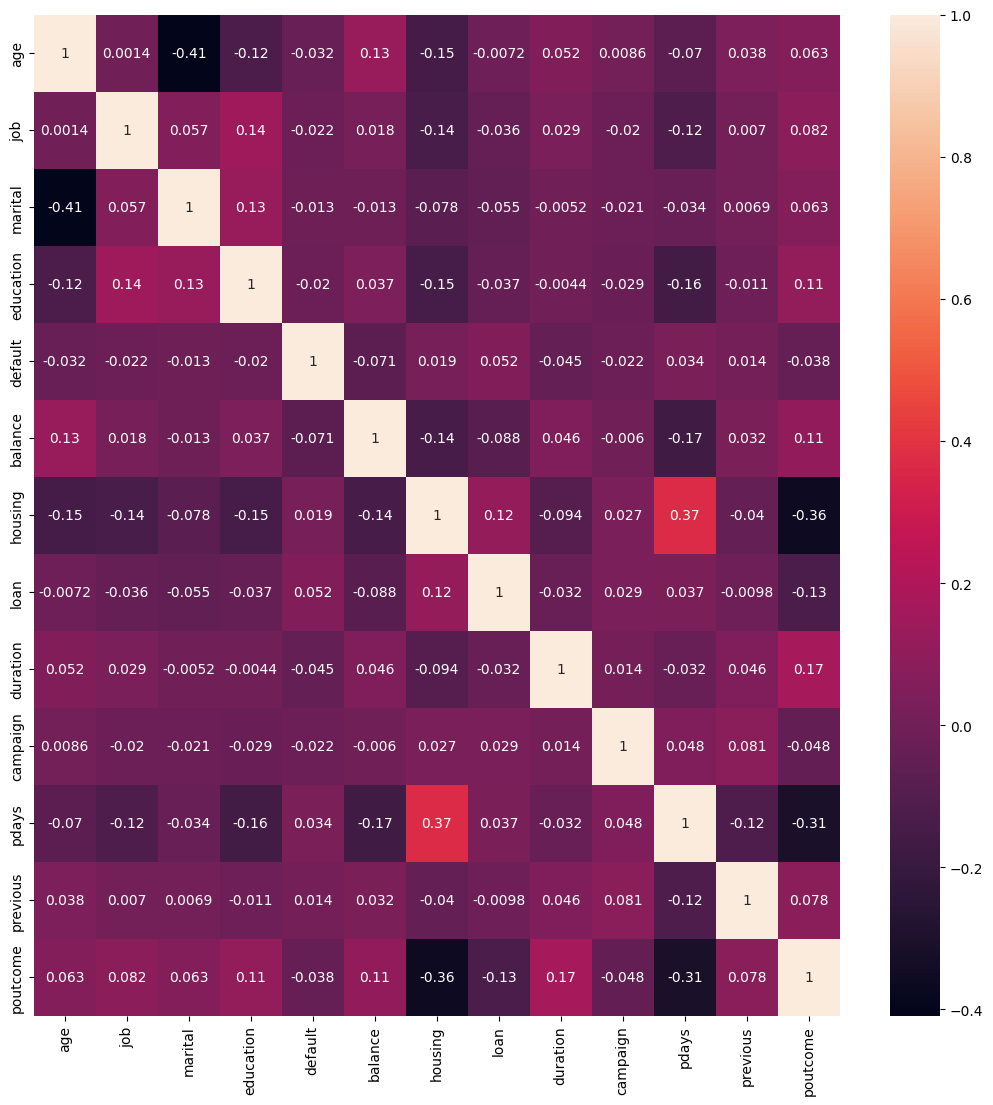

In [43]:
df_corr = df.copy()
# Selecting columns that will not be used
df_corr = df_corr.drop(columns=['contact','y','day', 'month','year', 'date', 'day_of_week'])
# Only using values from previous campaign
df_corr= df_corr[(df_corr['poutcome']!='other')&(df_corr['poutcome']!='ongoing')]
# Encode categorical columns using LabelEncoder
categorical_cols = ["job", "marital", "education", "default", "housing", "loan",'poutcome']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df_corr[col] = label_encoder.fit_transform(df_corr[col])

plt.figure(figsize=(13,13))
sns.heatmap(data=df_corr.corr(),annot=True )

There appears to be a noticeable correlation between the number of days past since the last calls made to a customer (pdays). A longer interval between calls (pdays) is associated with a higher risk of failure.

As for the call duration, there is also a correlation, we could appreciate before where longer duration calls has higher chances of succeding with the customer signing for a loan.

Furthermore, we can see a strong correlation between the housing and the outcome, where people who has a house loan are not agreeing for a new loan.
Something similar happen with those users who has a personal loan.

Regarding education and balance, we can say that people who has higher education level are more likely to accept a loan, and those with a positive balane as well.



## Understanding response patterns to past marketing campaigns


In [45]:
#Number of successful campaigns
success_count = df[df["poutcome"] == "success"].shape[0]

#Total count excluding "unknown" values in "poutcome" column
total_count = df[df["poutcome"] != "ongoing"].shape[0]

#Calculating conversion rate
cr = (success_count / total_count) * 100
print(f"{round(cr, 2)}% of clients are considered a success for the marketing campaign.")

18.71% of clients are considered a success for the marketing campaign.


Clarification: for this result we are considering all the clients from the previous campaign, including those who are classified as other, and therefore it is not clear whether these client were a success or failure.

In [46]:
#group by campaign (number of times that client was called) and calculate the success rate. this way we can see if it makes sense to call more or less for higher chances of success.
df_campaign = df[(df["poutcome"] != "other") & (df["poutcome"] != "ongoing")]
df_campaign_ = df_campaign.groupby(['campaign', 'poutcome'])['poutcome'].count().reset_index(name="outcome_count")

# Calculate the mean duration for each campaign and poutcome combination
mean_duration = df_campaign.groupby(['campaign', 'poutcome'])['duration'].mean().reset_index(name='duration_mean')

# Merge the mean duration DataFrame with the df_campaign DataFrame
df_campaign = pd.merge(df_campaign_, mean_duration, on=['campaign', 'poutcome'])

In [47]:
# Calculate conversion rate for each row
df_campaign['conversion_rate'] = df_campaign.apply(lambda row: row['outcome_count'] / df_campaign[df_campaign['campaign'] == row['campaign']]['outcome_count'].sum(), axis=1)

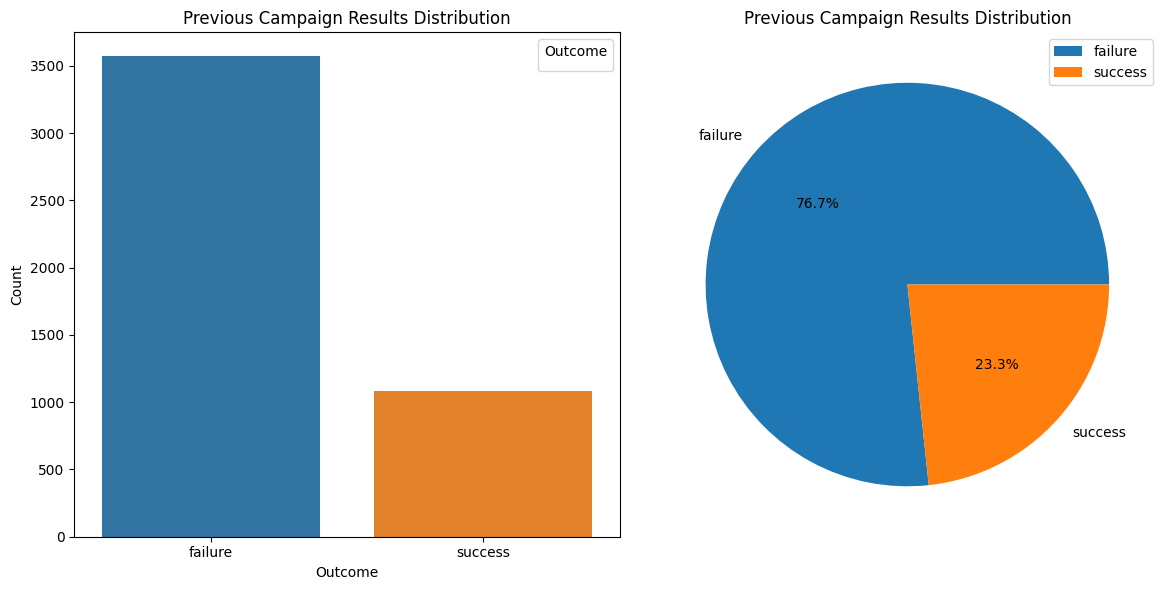

In [48]:
# Filter out 'ongoing' and 'other' values from 'poutcome' column
df_poutcome = df[(df['poutcome'] != 'ongoing') & (df['poutcome'] != 'other')]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Count plot
sns.countplot(data=df_poutcome, x='poutcome', hue='poutcome', ax=axes[0])
axes[0].set_title('Previous Campaign Results Distribution')
axes[0].set_xlabel('Outcome')
axes[0].set_ylabel('Count')
axes[0].legend(title='Outcome')

# Pie chart
axes[1].pie(df_poutcome['poutcome'].value_counts(), labels=df_poutcome['poutcome'].unique(), autopct='%1.1f%%')
axes[1].set_title('Previous Campaign Results Distribution')
axes[1].legend(df_poutcome['poutcome'].unique(), loc='upper right')

# Ensure equal aspect ratio for pie chart
axes[1].set_aspect('equal')

plt.tight_layout()
plt.show()

Success rate is higher now because we are only considering clients were we know the result can only be success or failure. The number of success and failure continue to be the same, but the total number of client under consideration has decreased.

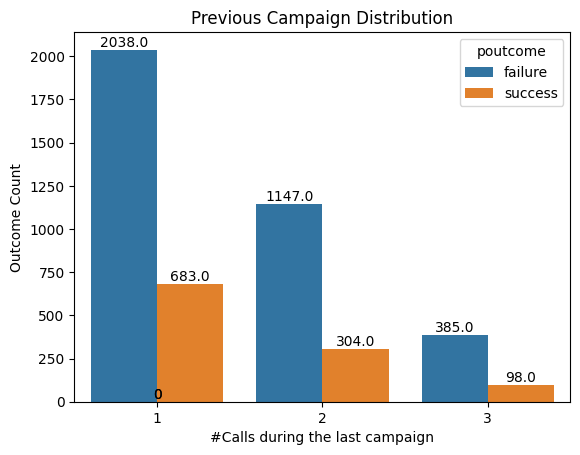

In [49]:
# Filter out bars with height equal to zero
df_filtered = df_campaign[df_campaign['outcome_count'] > 0]

# Create the bar plot
ax = sns.barplot(data=df_filtered, x='campaign', y='outcome_count', hue='poutcome')

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.xlabel('#Calls during the last campaign')
plt.ylabel('Outcome Count')
plt.title('Previous Campaign Distribution')
plt.show()


Based on the plot, we can conclude that it would be best o close a deal with the customer in the firs call.

The conversion ratio in the first call is around 25% while in second and third is only around 20%

## Financial Segmentation Analysis

In [50]:
def countplot_withY(label, dataset):
    dataset = dataset[(dataset["poutcome"] != "other") & (dataset["poutcome"] != "ongoing")]
    plt.figure(figsize=(20,10))
    Y = dataset[label]
    total = len(Y)*1.

    ax = sns.countplot(x=label, data=dataset, hue="poutcome")

    # Filter out bars with height equal to zero
    bars_to_keep = [bar for bar in ax.patches if bar.get_height() > 0]

    # Add value labels to each remaining bar
    for p in bars_to_keep:
      ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title(f'{label} ')

    plt.show()

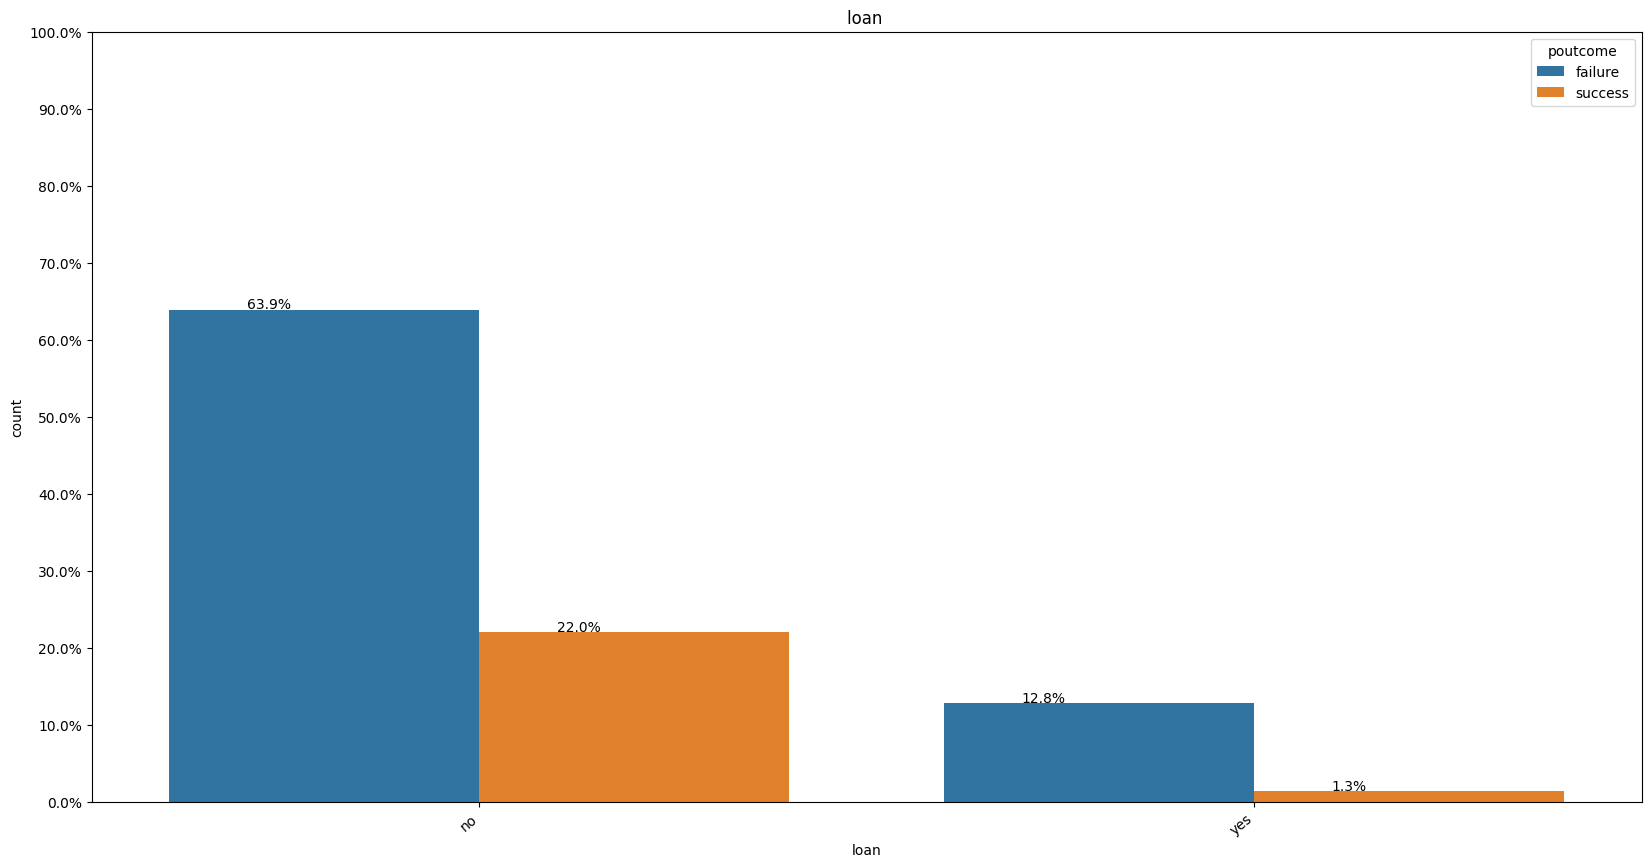

In [51]:
countplot_withY('loan', df)

Those that have not had a loan in the past show a high percentage (64%) of failure to achieve historical marketing campaigns while only 1.3% of customers that have had a loan in the past were successfully converted.

The following graphs show the percentage of success and failure individual values from various features had in past marketing campaigns (poutcome). Important to keep in mind that correlation is not causation (ex: just because we see a high number of people that have never taken a loan, and were not successfully converted in the marketing campaign, does not mean that the cause for lack of success was the lack of a loan).



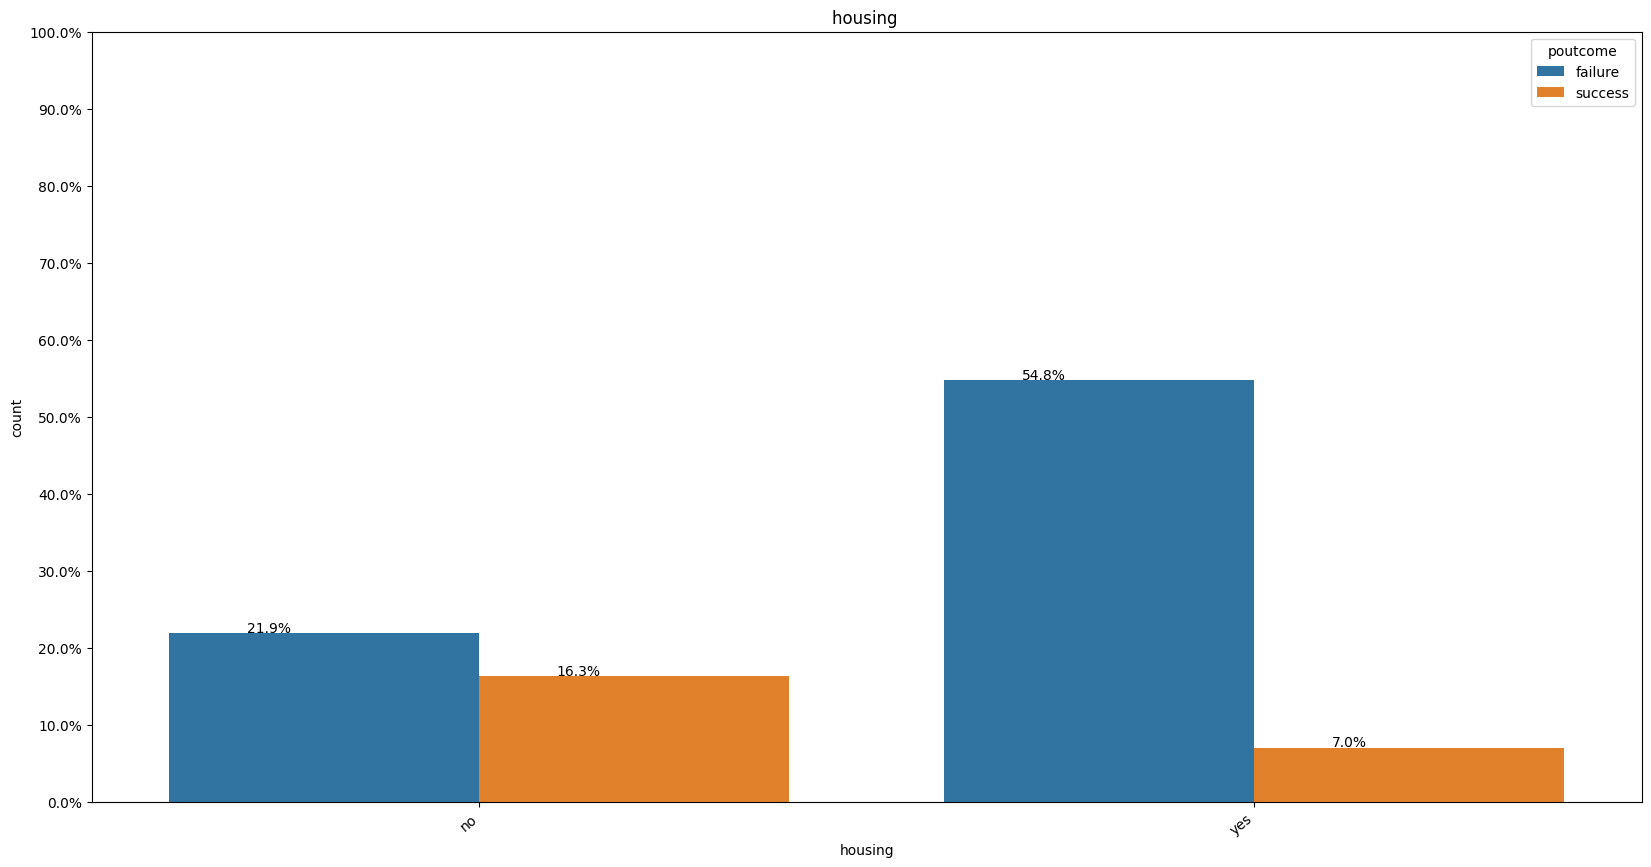

In [54]:
countplot_withY('housing', df)

Most of the people who asked for a loan for their houses are not agreeing the new loan.

There is a good chance that if the client does not have a housing loan, they will accept for the loan.

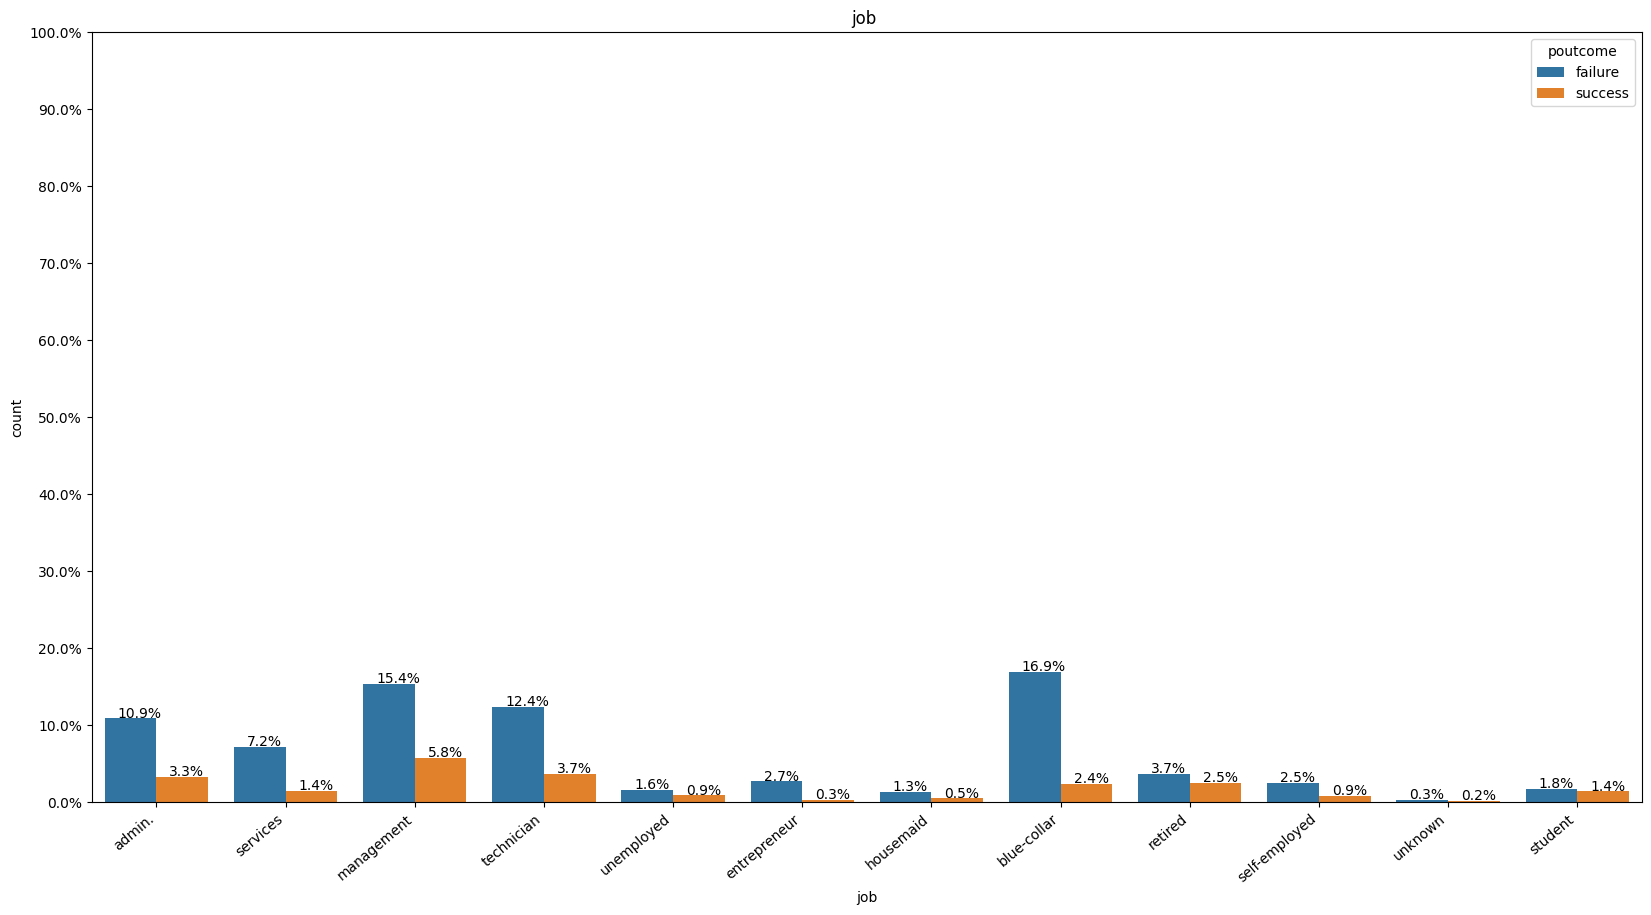

In [55]:
countplot_withY("job", df)

Most successful past marketing campaigns were by customers working in management, as students or retired.

For blue-collar workers, looking at the proportions there are higher chances of failure rather than for a user accepting a loan.

Unemployed, students, and retired seem to have equal chances of success and failure.
There is not a single job in which there were more successes than failures.

# Encoding categorical columns

In [153]:
df['month'] = df['month'].astype('int')

In [154]:
cat_cols= df.select_dtypes(include =[object])

In [155]:
df["y"].replace({"yes": True, "no": False}, inplace = True)

In [156]:
df = pd.get_dummies(df)

In [157]:
df.y.value_counts()

y
False    27089
True      2801
Name: count, dtype: int64

Seems like we have a highly imbalanced data, we are going to adress this further in the project.

# Model Selection and Evaluation

## Decision Tree

In [162]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop(["y", "duration","date"], axis = 1)  #drop duration column as this affect our model and is only used for benchmark (based on documentation)
y = df['y']

print(X.shape)
print(y.shape)
# Split the data into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the parameters for Decision Tree Classifier
dt_params = {'criterion': 'entropy',
             'max_depth': 10,
             'max_features': None,
             'min_samples_leaf': 4,
             'min_samples_split': 10}

# Define the Decision Tree Classifier with specified parameters
dt = DecisionTreeClassifier(**dt_params, random_state=0)

# Fitting the model to the training data
dt.fit(X_train, y_train)

# Predict using the trained model
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1-score:", f1_score(y_test, y_pred_dt))

(29890, 47)
(29890,)
Accuracy: 0.9208765473402476
Precision: 0.59375
Recall: 0.29174664107485604
F1-score: 0.3912483912483913


We can see that the f1 score is low, meaning that the model has some difficulty predicting customers who subscribe

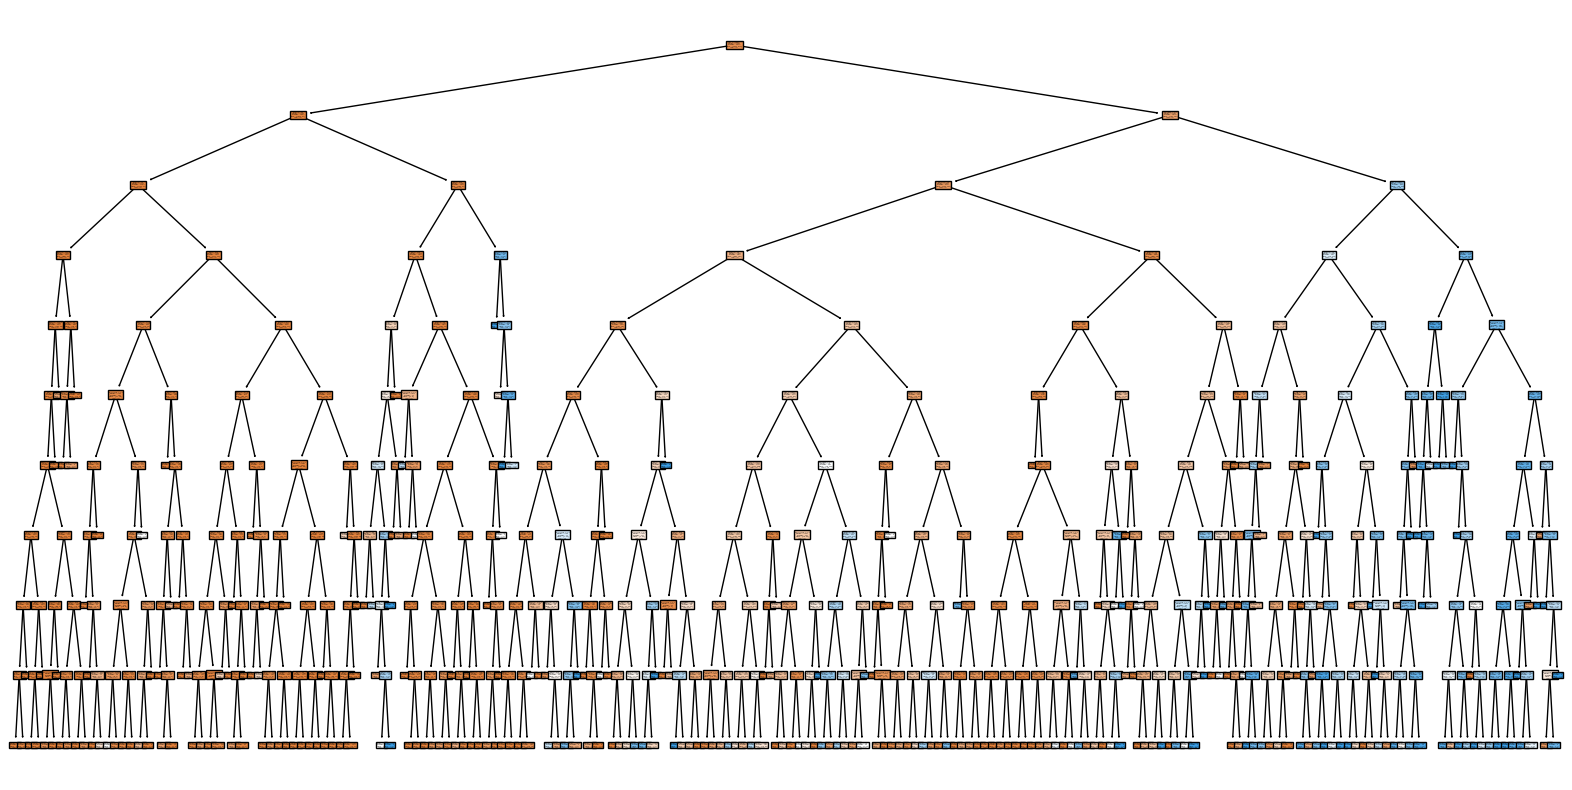

In [63]:
from sklearn import tree

plt.figure(figsize=(20, 10))  # Adjust the figure size as needed
tree.plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No", "Yes"])

# Save the plot as a high-quality image
plt.savefig('decision_tree_plot.png', dpi=300, bbox_inches='tight')

## Random Forest Classifier



### No hyper parameters. **Not balanced**

In [164]:
# Initialize Random Forest classifier
rf = RandomForestClassifier()

#splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Fitting data and model
rf.fit(X_train, y_train)
# forecasting with model
pred = rf.predict(X_test)
#preducting probability of forecast outcome
pred_probability = rf.predict_proba(X_test)


from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, pred)
print('CONFUSION MATRIX')
print(cm)

accuracy_score = accuracy_score(y_test, pred)
print('ACCURACY SCORE: ',accuracy_score)

classification_report = classification_report(y_test, pred)
print('CLASSIFICATION REPORT')
print(classification_report)

print('AUC-ROC:')
print(roc_auc_score(y_test, pred))

CONFUSION MATRIX
[[5366   91]
 [ 375  146]]
ACCURACY SCORE:  0.9220475075276012
CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.93      0.98      0.96      5457
        True       0.62      0.28      0.39       521

    accuracy                           0.92      5978
   macro avg       0.78      0.63      0.67      5978
weighted avg       0.91      0.92      0.91      5978

AUC-ROC:
0.6317772485426983


We can appreciate that the accuracy is high 0.92, however from the confusion matrix is possible to see that there are many  false negative values.

### Random Forest - No hyper parameters. ***BALANCED***

In [165]:
y_train.value_counts()

y
False    21632
True      2280
Name: count, dtype: int64

Random forrest seems to have performed quite well. However the target variable distrubution is strongly unbalanced. There are a lot more 'no' for marketing We will attempt to even out the data in attempt to increase the models performance and limit bias

In [166]:
# Calculate class weights
total_samples = df["y"].value_counts().sum()
# Initialize Random Forest classifier with class weights
rf_weighted = RandomForestClassifier(class_weight='balanced')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Fit the classifier to your training data
rf_weighted.fit(X_train, y_train)
# forecasting with model
pred = rf_weighted.predict(X_test)
#preducting probability of forecast outcome
pred_probability = rf_weighted.predict(X_test)

#EVALUATION OF MODEL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, pred)
print('CONFUSION MATRIX')
print(cm)

accuracy = accuracy_score(y_test, pred)
print('ACCURACY SCORE: ',accuracy)

class_report = classification_report(y_test, pred)
print('CLASSIFICATION REPORT')
print(class_report)

print('AUC-ROC:')
print(roc_auc_score(y_test, pred))

CONFUSION MATRIX
[[5370   87]
 [ 388  133]]
ACCURACY SCORE:  0.920541987286718
CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.93      0.98      0.96      5457
        True       0.60      0.26      0.36       521

    accuracy                           0.92      5978
   macro avg       0.77      0.62      0.66      5978
weighted avg       0.90      0.92      0.91      5978

AUC-ROC:
0.6196677426060384


Adding weights to the model slightly increased the precision of for the prediction of the 'yes' target which was originally undersampled. The confusion matrix shows no significant improvement.

### Random Forest - Hyper parameters. **Stratified**

In order to increase the models predictive powers and better its accuracy, we decided to try undersampling inorder to balance out the data. This way we have an even representation of successes and failures in the data. This comes at the cost of training the model with a lot less data. Also, we used stratified sampling to make sure that also after splitting the data into training and testing, we still have an even y distribution.

In [167]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Separate majority and minority classes
df_majority = df[df['y'] == False]
df_minority = df[df['y'] == True]

# Sample the majority class to match the size of the minority class
df_majority_sampled = df_majority.sample(n=len(df_minority), random_state=42)

# Concatenate the sampled majority class with the minority class
df_balanced = pd.concat([df_majority_sampled, df_minority])

# Shuffle the dataframe to mix the samples
#df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Initialize Random Forest classifier with class weights
rf_balanced = RandomForestClassifier(class_weight='balanced')

X = df_balanced.drop(["y", "duration","date"], axis = 1)
y = df_balanced['y']

# Split the dataset into training and testing sets. Stratified sampling for balanced y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

# Fit the classifier to your training data
rf_balanced.fit(X_train, y_train)

# Forecasting with the model
y_pred = rf_balanced.predict(X_test)

# Predicting probability of forecast outcome
y_pred_proba = rf_balanced.predict(X_test)

# Evaluation of model
print('CONFUSION MATRIX')
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('ACCURACY SCORE:', accuracy)

classification_report_str = classification_report(y_test, y_pred)
print('CLASSIFICATION REPORT')
print(classification_report_str)

print('AUC-ROC:')
print(roc_auc_score(y_test, y_pred))


CONFUSION MATRIX
[[464  97]
 [ 76 484]]
ACCURACY SCORE: 0.8456735057983943
CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.86      0.83      0.84       561
        True       0.83      0.86      0.85       560

    accuracy                           0.85      1121
   macro avg       0.85      0.85      0.85      1121
weighted avg       0.85      0.85      0.85      1121

AUC-ROC:
0.845690094219506


Accuracy has decreased  by 10% which is significant, but the confusion matrix accuracy has changed showing better precision when identifying true positive and true negative.

The f1-score for true values has improved in almost 50%

The AUC-ROC score, which measures the trade-off between true positive rate and false positive rate across different classification thresholds, is considerably high in this model (0.85). This model is better at discriminating between classes.

Text(0.5, 1.0, 'Confusion Matrix')

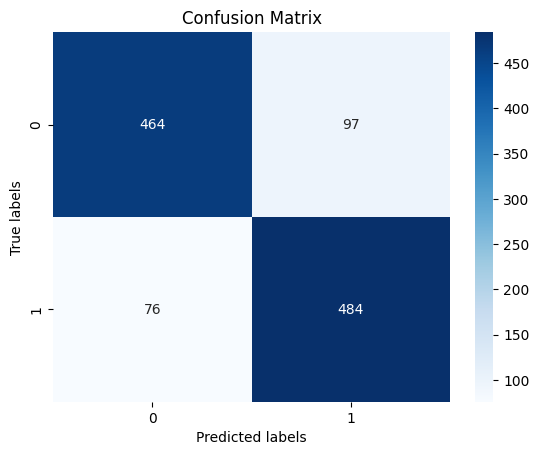

In [168]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Show the plot

We now undersampled the unbalanced target variable in an attempt to gain better model performance.

This did lead to less false positives however this jeopardized the model accuracy.

In [169]:
rf_balanced.predict_proba(X_test)[:, 1]

array([0.64, 0.96, 0.09, ..., 0.23, 0.74, 0.2 ])

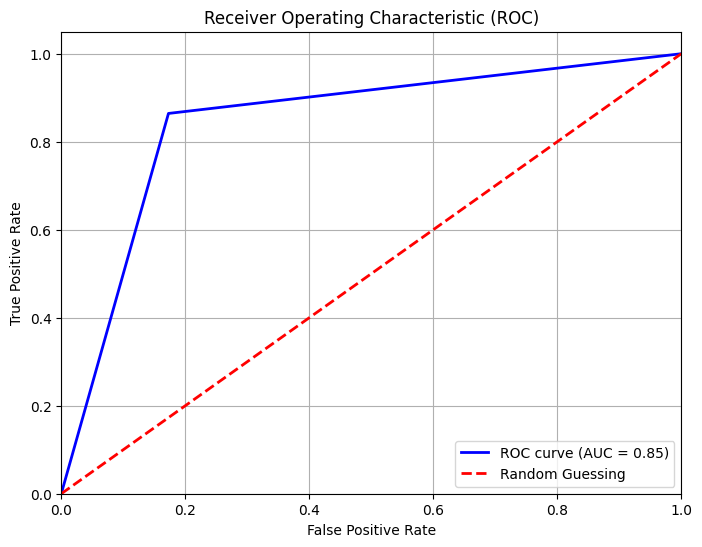

In [170]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
# y_pred_proba = rf_balanced.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC-ROC score
auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


### Feature Importance Extraction

In [171]:
# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame to hold feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(feature_importance_df)

                  Feature  Importance
1                 balance    0.123170
0                     age    0.112117
7                    year    0.102674
2                     day    0.092443
3                   month    0.086990
39       poutcome_success    0.057824
5                   pdays    0.049485
4                campaign    0.030333
6                previous    0.025899
30            housing_yes    0.018296
29             housing_no    0.016669
41     day_of_week_Monday    0.013632
45    day_of_week_Tuesday    0.013356
44   day_of_week_Thursday    0.012924
46  day_of_week_Wednesday    0.012832
24    education_secondary    0.012515
40     day_of_week_Friday    0.012450
36       poutcome_failure    0.012228
21        marital_married    0.012217
17         job_technician    0.012028
12         job_management    0.011971
25     education_tertiary    0.011834
33       contact_cellular    0.011599
22         marital_single    0.011338
8              job_admin.    0.010747
37       pou

As there are quite a few features with low importance scores, below 0.01, we will exclude those features in the next attempt to imporve the random forrest classifiers performance, using the undersampled balanced data.

In [172]:
#features with importance scores below 0.01
low_importance_features = feature_importance_df[feature_importance_df['Importance'] < 0.01]['Feature'].tolist()

print("Features with importance scores below 0.01:")
print(low_importance_features)


Features with importance scores below 0.01:
['poutcome_ongoing', 'contact_unknown', 'marital_divorced', 'job_blue-collar', 'education_primary', 'job_services', 'loan_no', 'loan_yes', 'job_retired', 'job_student', 'poutcome_other', 'job_unemployed', 'education_unknown', 'contact_telephone', 'job_self-employed', 'job_entrepreneur', 'job_housemaid', 'job_unknown', 'default_no', 'default_yes', 'day_of_week_Saturday', 'day_of_week_Sunday']


### Random Forest - Most important features and Balanced data

In [173]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize Random Forest classifier with class weights
rf= RandomForestClassifier(class_weight='balanced')

X = df.drop(low_importance_features, axis = 1)
X = X.drop(["y","duration","date"], axis = 1) #drop duration if there

#X = X.drop(low_importance_features, axis = 1)
y = df['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

# Fit the classifier to your training data
rf.fit(X_train, y_train)

# Forecasting with the model
y_pred = rf.predict(X_test)

# Predicting probability of forecast outcome
y_pred_proba = rf.predict(X_test)

# Evaluation of model
print('CONFUSION MATRIX')
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print('ACCURACY SCORE:', accuracy)

classification_report_str = classification_report(y_test, y_pred)
print('CLASSIFICATION REPORT')
print(classification_report_str)

print('AUC-ROC:')
print(roc_auc_score(y_test, y_pred))


CONFUSION MATRIX
[[5325   93]
 [ 396  164]]
ACCURACY SCORE: 0.9182000669120107
CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.93      0.98      0.96      5418
        True       0.64      0.29      0.40       560

    accuracy                           0.92      5978
   macro avg       0.78      0.64      0.68      5978
weighted avg       0.90      0.92      0.90      5978

AUC-ROC:
0.6378460686600222


Too high number of false positives

Removing the low importance features lead to a worse performance.

### Random Forest - Most important features, balanced and under sample

In [175]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Separate majority and minority classes
df_majority = df[df['y'] == False]
df_minority = df[df['y'] == True]

# Sample the majority class to match the size of the minority class
df_majority_sampled = df_majority.sample(n=len(df_minority), random_state=42)

# Concatenate the sampled majority class with the minority class
df_balanced = pd.concat([df_majority_sampled, df_minority])

# Shuffle the dataframe to mix the samples
#df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Initialize Random Forest classifier with class weights
rf_balanced = RandomForestClassifier(class_weight='balanced')

X = df_balanced.drop(low_importance_features, axis = 1)
X = X.drop(["y","duration","date"], axis = 1) #drop duration if there

y = df_balanced['y']

# Split the dataset into training and testing sets. Stratified sampling for balanced y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

# Fit the classifier to your training data
rf_balanced.fit(X_train, y_train)

# Forecasting with the model
y_pred = rf_balanced.predict(X_test)

# Predicting probability of forecast outcome
y_pred_proba = rf_balanced.predict(X_test)

# Evaluation of model
print('CONFUSION MATRIX')
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('ACCURACY SCORE:', accuracy)

classification_report_str = classification_report(y_test, y_pred)
print('CLASSIFICATION REPORT')
print(classification_report_str)

print('AUC-ROC:')
print(roc_auc_score(y_test, y_pred))


CONFUSION MATRIX
[[469  92]
 [ 82 478]]
ACCURACY SCORE: 0.8447814451382694
CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.85      0.84      0.84       561
        True       0.84      0.85      0.85       560

    accuracy                           0.84      1121
   macro avg       0.84      0.84      0.84      1121
weighted avg       0.84      0.84      0.84      1121

AUC-ROC:
0.8447892793481029


Removing the low importance features from the undersample dataset did not make a significant difference.

# Over sampling data

We are going to try another way to predict results from users by using the GB method and, instead of undersampling the data due to the imbalance target column, this time we will oversample this.

To over sample we will use the SMOTE technique (Syntetic Minority Over-Sample Technique) from imblearn

6. Random Forest classification - Oversampling

In [178]:
sm = SMOTE(random_state = 42)

# Split the dataset into training and testing sets. Stratified sampling for balanced y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,stratify=y)

#Oversampling the train data with SMOTE
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Training the rf model with the oversampled data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

# Testing the model
y_pred = rf.predict(X_test)

# Evaluation of model
print('CONFUSION MATRIX')
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print('ACCURACY SCORE:', accuracy)

classification_report_str = classification_report(y_test, y_pred)
print('CLASSIFICATION REPORT')
print(classification_report_str)

print('AUC-ROC:')
print(roc_auc_score(y_test, y_pred))


CONFUSION MATRIX
[[467  94]
 [ 84 476]]
ACCURACY SCORE: 0.8412132024977699
CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.85      0.83      0.84       561
        True       0.84      0.85      0.84       560

    accuracy                           0.84      1121
   macro avg       0.84      0.84      0.84      1121
weighted avg       0.84      0.84      0.84      1121

AUC-ROC:
0.8412210338680927


Similar results to the ones we have in our last model, undersample model.


Text(0.5, 1.0, 'Confusion Matrix')

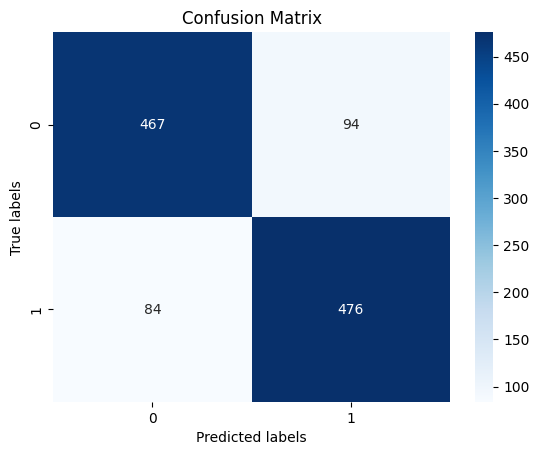

In [179]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

### Gradient Boosting - **No oversampled**

In [180]:
# Calling the model
gbm = GradientBoostingClassifier(random_state=42)

# Training the model
gbm.fit(X_train, y_train)

#Testing model
y_pred_gbm = gbm.predict(X_test)

# Evaluation of model
print('CONFUSION MATRIX')
cm = confusion_matrix(y_test,y_pred_gbm)
print(cm)
accuracy = accuracy_score(y_test,y_pred_gbm)
print('ACCURACY SCORE:', accuracy)

classification_report_str = classification_report(y_test,y_pred_gbm)
print('CLASSIFICATION REPORT')
print(classification_report_str)

print('AUC-ROC:')
print(roc_auc_score(y_test, y_pred_gbm))

CONFUSION MATRIX
[[474  87]
 [ 83 477]]
ACCURACY SCORE: 0.848349687778769
CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.85      0.84      0.85       561
        True       0.85      0.85      0.85       560

    accuracy                           0.85      1121
   macro avg       0.85      0.85      0.85      1121
weighted avg       0.85      0.85      0.85      1121

AUC-ROC:
0.8483527501909854


Results similars to the first ones from RF

### Gradient Boosting - **Oversampled**

In [181]:
sm = SMOTE(random_state = 42)

#Oversampling the train data with SMOTE
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Calling the model
gbm = GradientBoostingClassifier(random_state=42)

# Training the model
gbm.fit(X_train_resampled, y_train_resampled )

#Testing model
y_pred_gbm = gbm.predict(X_test)

# Evaluation of model
print('CONFUSION MATRIX')
cm = confusion_matrix(y_test,y_pred_gbm)
print(cm)
accuracy = accuracy_score(y_test,y_pred_gbm)
print('ACCURACY SCORE:', accuracy)

classification_report_str = classification_report(y_test,y_pred_gbm)
print('CLASSIFICATION REPORT')
print(classification_report_str)

print('AUC-ROC:')
print(roc_auc_score(y_test, y_pred_gbm))

CONFUSION MATRIX
[[476  85]
 [ 85 475]]
ACCURACY SCORE: 0.848349687778769
CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.85      0.85      0.85       561
        True       0.85      0.85      0.85       560

    accuracy                           0.85      1121
   macro avg       0.85      0.85      0.85      1121
weighted avg       0.85      0.85      0.85      1121

AUC-ROC:
0.8483495670995671


# Model conclution
Based on the different models presented before we can conclude that the Random forest classification is the best model to continue with the analysis.

Next step is to find out the best parameters to work with this model.

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Calling the model
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': np.arange(2, 10),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'max_features': [None, 'sqrt', 'log2'],
}

ran_search_rf = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=1)
ran_search_rf.fit(X_train, y_train)

print('Best parameters are: ', ran_search_rf.best_params_)
print('Best score for these parameters:', ran_search_rf.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are:  {'n_estimators': 350, 'min_samples_split': 3, 'min_samples_leaf': 15, 'max_features': None, 'max_depth': 8}
Best score for these parameters: 0.9216293975780141


## Improved RF

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
import numpy as np

# Calling the model with the new parameters
improved_rf = RandomForestClassifier(
    n_estimators=350,
    max_depth=8,
    min_samples_split=3,
    min_samples_leaf=15,
    max_features=None
)

# Training the model
improved_rf.fit(X_train, y_train)

# Predict with the model
y_pred_proba = improved_rf.predict_proba(X_test)[:, 1]

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluation of model
print('CONFUSION MATRIX')
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('ACCURACY SCORE:', accuracy)

classification_report_str = classification_report(y_test, y_pred)
print('CLASSIFICATION REPORT')
print(classification_report_str)

print('AUC-ROC:')
print(roc_auc_score(y_test, y_pred_proba))


CONFUSION MATRIX
[[478  83]
 [ 90 470]]
ACCURACY SCORE: 0.8456735057983943
CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.84      0.85      0.85       561
        True       0.85      0.84      0.84       560

    accuracy                           0.85      1121
   macro avg       0.85      0.85      0.85      1121
weighted avg       0.85      0.85      0.85      1121

AUC-ROC:
0.898637636872931


## Improved RF oversampled

We will look as well for the best parameteres for the oversampled random forest

In [185]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Calling the model
rf = RandomForestClassifier()

param_grid = {
    'n_estimators': np.arange(100, 500, 50),
    'max_depth': np.arange(2, 10),
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 20),
    'max_features': [None, 'sqrt', 'log2'],
}

ran_search_rf = RandomizedSearchCV(rf, param_distributions=param_grid, n_iter=50, cv=5, n_jobs=-1, verbose=1)
ran_search_rf.fit(X_train_resampled, y_train_resampled)

print('Best parameters are: ', ran_search_rf.best_params_)
print('Best score for these parameters:', ran_search_rf.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are:  {'n_estimators': 150, 'min_samples_split': 15, 'min_samples_leaf': 6, 'max_features': None, 'max_depth': 8}
Best score for these parameters: 0.8384647734511865


In [186]:
# Calling the model with the new parameters
improved_rf = RandomForestClassifier(
    n_estimators = 150,
    max_depth = 8,
    min_samples_split= 15,
    min_samples_leaf= 6,
    max_features= None,
)

# Training the model

improved_rf.fit(X_train_resampled, y_train_resampled)

# Predict with the model

y_pred = improved_rf.predict(X_test)
y_pred_proba = improved_rf.predict_proba(X_test)[:,1]


# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluation of model
print('CONFUSION MATRIX')
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print('ACCURACY SCORE:', accuracy)

classification_report_str = classification_report(y_test, y_pred)
print('CLASSIFICATION REPORT')
print(classification_report_str)

print('AUC-ROC:')
print(roc_auc_score(y_test, y_pred_proba))


CONFUSION MATRIX
[[480  81]
 [ 87 473]]
ACCURACY SCORE: 0.8501338090990187
CLASSIFICATION REPORT
              precision    recall  f1-score   support

       False       0.85      0.86      0.85       561
        True       0.85      0.84      0.85       560

    accuracy                           0.85      1121
   macro avg       0.85      0.85      0.85      1121
weighted avg       0.85      0.85      0.85      1121

AUC-ROC:
0.9020435446906034


### Comparison model

Precision : Both models has a similar precision  (0.85), which indicates that both models can properly identify actual positive cases without mistakenly classifying negative cases as positive.

Recall (class 1): Same as before, both models have same recall for class 1 (0.84), which means that it can correctly identify a higher proportion of positive cases.

F1-score (class 1): The F1-score is a combination of precision and recall, providing a single metric for comparing the models. In this case, the second model has a slightly higher F1-score (0.85 vs. 0.84), suggesting that it may provide a better balance between precision and recall.

#Random Forrest with Grid Search

In [ ]:
#commentd out bc takes 4 hours to train

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # Creating the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['auto', 'sqrt', 'log2']
# }

# rf_cv = GridSearchCV(rf, param_grid, cv=5)
# rf_cv.fit(X_train, y_train)
# y_pred = rf_cv.predict(X_test)

# # EVALUATION
# print("Tuned random forrest classifier Parameters: {}".format(rf_cv.best_params_))
# print("Best score is {}".format(rf_cv.best_score_))

# mean_scores = rf_cv.cv_results_['mean_test_score']

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(range(len(mean_scores)), mean_scores, marker='o', color='b')
# plt.xlabel('Parameter Combination')
# plt.ylabel('CV Average Score')
# plt.title('Random Forest Classifier Performance')
# plt.grid(True)
# plt.show()

In [ ]:
#saving and downloading model
# joblib.dump(rf_cv, 'model_rf_cv.pkl')


In [196]:
#heavy. wait until fully uploaded
rf_cv = joblib.load('model_rf_cv.pkl')

Tuned Random Forest Regression Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best score is 0.9048606896148925


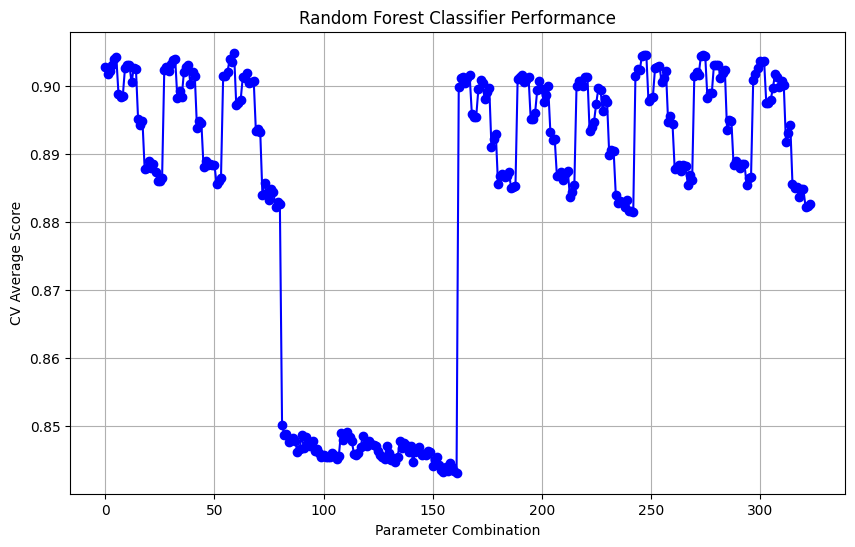

In [201]:
print("Tuned Random Forest Regression Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))
mean_scores = rf_cv.cv_results_['mean_test_score']
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_scores)), mean_scores, marker='o', color='b')
plt.xlabel('Parameter Combination')
plt.ylabel('CV Average Score')
plt.title('Random Forest Classifier Performance')
plt.grid(True)
plt.show()


# # Evaluation of model
# print('CONFUSION MATRIX')
# cm = confusion_matrix(y_test, y_pred)
# print(cm)

# accuracy = accuracy_score(y_test, y_pred)
# print('ACCURACY SCORE:', accuracy)

# classification_report_str = classification_report(y_test, y_pred)
# print('CLASSIFICATION REPORT')
# print(classification_report_str)

# print('AUC-ROC:')
# print(roc_auc_score(y_test, y_pred_proba))


The accuracy score of the random forest model using grid seach for hyperparameter tuning resulted in around 90%.

#Neural Network

In [189]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Separate majority and minority classes
df_majority = df[df['y'] == False]
df_minority = df[df['y'] == True]

# Sample the majority class to match the size of the minority class
df_majority_sampled = df_majority.sample(n=len(df_minority), random_state=42)

# Concatenate the sampled majority class with the minority class
df_balanced = pd.concat([df_majority_sampled, df_minority])

X = df_balanced.drop(low_importance_features, axis = 1)
X = X.drop(["y","duration","date"], axis = 1) #drop duration if there

y = df_balanced['y']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)
X_train = X_train.astype('int')
X_test = X_test.astype('int')

# Define the model architecture
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Adjust input shape
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/25
126/126 [==============================] - 2s 5ms/step - loss: 71.7475 - accuracy: 0.5233 - val_loss: 13.3931 - val_accuracy: 0.5991
Epoch 2/25
126/126 [==============================] - 1s 5ms/step - loss: 40.3719 - accuracy: 0.5263 - val_loss: 7.9488 - val_accuracy: 0.5880
Epoch 3/25
126/126 [==============================] - 1s 5ms/step - loss: 26.5779 - accuracy: 0.5404 - val_loss: 6.0248 - val_accuracy: 0.6102
Epoch 4/25
126/126 [==============================] - 1s 7ms/step - loss: 17.1917 - accuracy: 0.5484 - val_loss: 4.1023 - val_accuracy: 0.6169
Epoch 5/25
126/126 [==============================] - 1s 5ms/step - loss: 10.5700 - accuracy: 0.5541 - val_loss: 4.1967 - val_accuracy: 0.5813
Epoch 6/25
126/126 [==============================] - 1s 5ms/step - loss: 6.5107 - accuracy: 0.5513 - val_loss: 1.5807 - val_accuracy: 0.6682
Epoch 7/25
126/126 [==============================] - 1s 5ms/step - loss: 3.5378 - accuracy: 0.5670 - val_loss: 1.7640 - val_accuracy: 0.6169


In [190]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Predict probabilities and class labels
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('CONFUSION MATRIX:')
print(cm)

# Calculate classification report
classification_report_str = classification_report(y_test, y_pred)
print('CLASSIFICATION REPORT:')
print(classification_report_str)

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)
print('AUC-ROC:', auc_roc)


36/36 [==============================] - 0s 2ms/step
CONFUSION MATRIX:
[[401 160]
 [195 365]]
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.67      0.71      0.69       561
        True       0.70      0.65      0.67       560

    accuracy                           0.68      1121
   macro avg       0.68      0.68      0.68      1121
weighted avg       0.68      0.68      0.68      1121

AUC-ROC: 0.7385854341736695


The accuracy of the neural network is lower than the previously trained random forrest model.

# Conclusion

## Random forest conclusion
The choice whether to undersample the dataset, or not, to train the model depends on the specific goals and priorities of the bank. If the bank wants avoid wasting resources on targeting customers who are not likely to subscribe to a term deposit, then the RF model without undersampling would be more appropriate.

However, if the bank wants to maximize the number of positive cases captured (identify as many potential term deposit subscribers as possible), the RF Model with Oversampling would be better suited.

It is important to note that there is always a trade-off between precision and recall, and the choice of the model should be based on the specific requirements of the bank.

## Conclusions based on past campaign

Based on past campaigns, several key insights can be drawn regarding customer acceptance of loans:

* Age: Users between the ages of 30 to 35 show a higher likelihood of accepting a loan, with a potential area for improvement among individuals aged 60 to 80. Older individuals tend to be more receptive to loan offers.

* Call Duration: Calls with an average duration lower than 5 minutes are associated with a higher chance of loan rejection. However, for individuals over 60, shorter calls often result in loan acceptance.

* Timing: March, June, and particularly September are the most favorable months for customer acceptance of loans. Focusing efforts on contacting customers during these months may improve conversion rates. Additionally, the end of the month sees an increase in loan acceptance.

* Day of the Week: Tuesdays exhibit the highest success rate in loan acceptance, while Fridays have the lowest success rate.

* Pdays (Interval between Calls): A longer interval between calls is linked to a higher risk of loan rejection.

* Existing Loans: Customers with existing house loans or personal loans are less likely to accept new loans.

* Default History: Individuals with a history of default are less inclined to take out a loan.

* Occupation: Management professionals, students, and retirees show higher acceptance ratios for loans. Conversely, blue-collar workers have a higher likelihood of loan rejection.

By focusing efforts on specific age groups, optimizing call duration and timing, and tailoring loan offers based on occupation and existing financial commitments, the bank can enhance its loan acceptance rates and overall campaign effectiveness.